### 데이터사이언스

In [12]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('datas/train.csv')
test_data = pd.read_csv('datas/test.csv')

In [3]:
# 데이터프레임 기본 정보 확인
train_data.info()

# 데이터프레임의 첫 5행 출력
train_data.head()

# 열별 분석
for i in range(28):  # 열의 개수가 28개인 경우
    column_name = train_data.columns[i]
    print(f"\n--- 열: {column_name} ---")
    
    # 열의 값 분포 확인
    print("항목별 개수:")
    print(train_data.iloc[:, i].value_counts())
    
    # 열의 기본 통계량 출력 (숫자형인 경우)
    if train_data.iloc[:, i].dtype in ['int64', 'float64']:
        print("\n기본 통계분석:")
        print(train_data.iloc[:, i].describe())
    
    # 결측치 여부 확인
    missing_values = train_data.iloc[:, i].isnull().sum()
    print(f"\n결측치 개수: {missing_values}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644768 entries, 0 to 1644767
Data columns (total 28 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   User                           1644768 non-null  int64  
 1   Gender                         1644768 non-null  int64  
 2   Current Age                    1644768 non-null  int64  
 3   Retirement Age                 1644768 non-null  int64  
 4   Birth Year                     1644768 non-null  int64  
 5   Birth Month                    1644768 non-null  int64  
 6   Zipcode                        1644768 non-null  float64
 7   Per Capita Income - Zipcode    1644768 non-null  int64  
 8   Yearly Income                  1644768 non-null  float64
 9   Total Debt                     1644768 non-null  float64
 10  Credit Score                   1644768 non-null  int64  
 11  Year                           1644768 non-null  int64  
 12  Month         

In [4]:
#라벨링 잔뜩

from sklearn.preprocessing import LabelEncoder

# 1. 라벨 인코딩할 열들 지정
label_cols = ['Card Brand', 'Card Type', 'Error Message', 'Is Fraud?']

# 2. 각 열에 대해 라벨 인코딩 수행
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    label_encoders[col] = le  # 나중에 필요하면 인코더 저장 (복원할 때 사용 가능)

# 3. 날짜 데이터를 8자리 숫자로 변환
# 'Expires' 변환 (MM/YYYY -> YYYYMMDD)
train_data['Expires'] = train_data['Expires'].apply(lambda x: x.split('/')[1] + x.split('/')[0] + '01')

# 'Acct Open Date' 변환 (MM/YYYY -> YYYYMMDD)
train_data['Acct Open Date'] = train_data['Acct Open Date'].apply(lambda x: x.split('/')[1] + x.split('/')[0] + '01')

# 날짜 형식을 int 타입으로 변환
train_data['Expires'] = train_data['Expires'].astype(int)
train_data['Acct Open Date'] = train_data['Acct Open Date'].astype(int)

# 결과 확인
print(train_data.info())
print(train_data.head())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644768 entries, 0 to 1644767
Data columns (total 28 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   User                           1644768 non-null  int64  
 1   Gender                         1644768 non-null  int64  
 2   Current Age                    1644768 non-null  int64  
 3   Retirement Age                 1644768 non-null  int64  
 4   Birth Year                     1644768 non-null  int64  
 5   Birth Month                    1644768 non-null  int64  
 6   Zipcode                        1644768 non-null  float64
 7   Per Capita Income - Zipcode    1644768 non-null  int64  
 8   Yearly Income                  1644768 non-null  float64
 9   Total Debt                     1644768 non-null  float64
 10  Credit Score                   1644768 non-null  int64  
 11  Year                           1644768 non-null  int64  
 12  Month         

In [5]:
# 상관관계 계산
correlation_matrix = train_data.corr()

# 상관관계 결과를 CSV로 저장
correlation_csv_path = 'datas/파생/correlation_matrix.csv'
correlation_matrix.to_csv(correlation_csv_path)

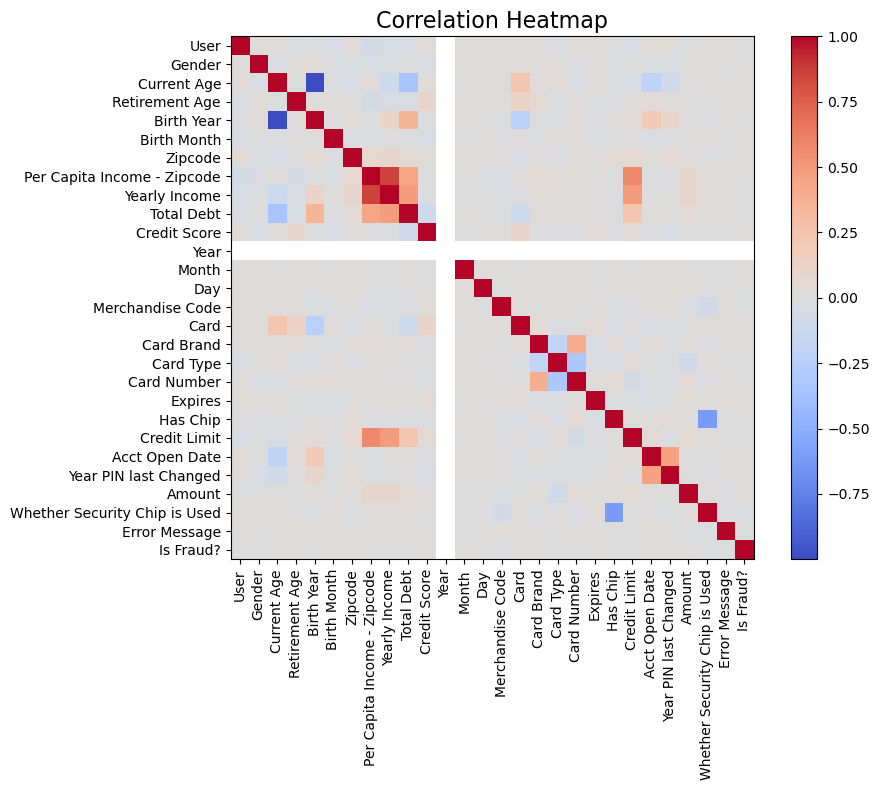

In [6]:
# 히트맵 그리기
plt.figure(figsize=(10, 8))
plt.title("Correlation Heatmap", fontsize=16)
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(heatmap)
plt.xticks(np.arange(28), labels=correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(28), labels=correlation_matrix.columns)

plt.tight_layout()
plt.show()

In [ ]:
from autofeat import AutoFeatRegressor

# 모델과 자동 피처 생성기 초기화
afreg = AutoFeatRegressor()
train_data.fillna(0)
# X는 입력 데이터, y는 타겟 값
X_new = afreg.fit_transform(train_data.drop(columns=['Is Fraud?']), train_data['Is Fraud?'])

# 새로 생성된 피처 확인
print(X_new.head())

In [ ]:
import numpy as np
from scipy import stats


#nan, outlier
def analyze_and_handle_missing_data(df):
    # nan확인
    nan_counts = df.isna().sum()
    nan_counts_with_nan = nan_counts[nan_counts > 0]

    # 결측치출력
    for column, count in nan_counts_with_nan.items():
        print(f"{column}: {count}개의 결측치")
        print(f"{column}: {df[column].dtype}")
        print(df[column].value_counts())  # Print non-NaN value counts

    # 결측치 평균으로 대체
    #for column in nan_counts_with_nan.index:
    #    if df[column].dtype in [np.float64, np.int64]:  # Only fill for numeric columns
    #        df[column].fillna(df[column].mean(), inplace=True)

    # outlier
    def detect_outliers_zscore(data):
        z_scores = np.abs(stats.zscore(data))
        return z_scores > 3

    for column in df.select_dtypes(include=[np.number]).columns:
        # Detect outliers using Z-score
        outliers_zscore = detect_outliers_zscore(df[column])
        print(f"Column {column} has {outliers_zscore.sum()} outliers detected by Z-score")
        # Histogram visualization
        plt.figure(figsize=(10, 6))
        
        # Overall data histogram visualization
        sns.histplot(df[column], kde=True, color='lightblue', label='Data', bins=30)
        
        # Outliers data histogram visualization
        sns.histplot(df.loc[outliers_zscore, column], kde=True, color='red', label='Z-score Outliers', bins=30)
        
        plt.title(f'Z-score Outliers Detection in {column}')
        plt.legend()
        plt.show()

    return df

# Example usage:
# cleaned_df = analyze_and_handle_missing_data(your_dataframe)
cleaned_df = analyze_and_handle_missing_data(train_data)
cleaned_df.head(5)
cleaned_df.shape